Our two organisms with stoichiometric matrices S1 and S2 respectively:

*   Have some metabolites in common and some metabolites that differ from each
*   Have some reactions in common and some reactions that differ from each

#CODE:
The code was developed by integrating the code solution from our first homework assignment on genetic algorithms, the class notebook (accessible at (https://colab.research.google.com/drive/1PjhB_fyWTVohCDqQFycOod5xeeHfby_F?usp=sharing)), and many personal integrations to add all the functions needed to address the project objectives. ChatGPT was mainly used to help us with the creation of the S1_union and S2_union matrices. This step was crucial for ensuring consistent row and column ordering throughout the process, which is necessary to maintain coherence when transforming data between matrix and string formats.

In [1]:
import numpy as np # Imports Python numerical library
import seaborn as sns # Imports Library for drawing heatmaps
import matplotlib.pyplot as plt # Import Library for plotting graphs
from scipy.optimize import linprog # Imports Linear Programming function
from scipy.optimize import linprog_verbose_callback # Imports Linear Programming function
import random
import seaborn as sns

STOICHIOMETRIC MATRIX ORGANISM 1 -->S1

---



STOICHIOMETRIC MATRIX S1


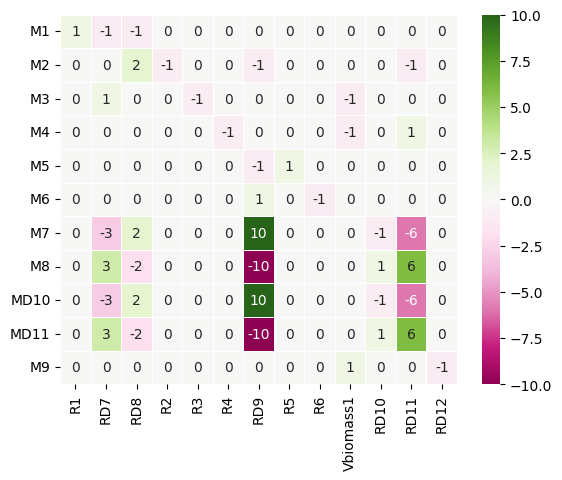

<Figure size 640x480 with 0 Axes>

In [2]:
#STOICHIOMETRIC MATRIX ORGANISM 1 -->S1
reacs =["R1","RD7","RD8","R2","R3","R4","RD9","R5","R6","Vbiomass1","RD10","RD11","RD12"]
metabs = ["M1","M2","M3","M4","M5","M6","M7","M8","MD10","MD11","M9"]

n = len(reacs)
m = len(metabs)

S1=np.array([[1  , -1  ,  -1 ,    0  ,   0  ,   0  ,   0  ,   0  ,   0   ,  0  ,   0   ,  0   ,  0],
[0  ,  0   ,  2   , -1   ,  0   ,  0   , -1  ,   0  ,   0  ,   0   ,  0  ,  -1  ,   0],
[0  ,  1  ,   0   ,  0  ,  -1   ,  0  ,   0  ,   0  ,   0  ,  -1   ,  0   ,  0  ,   0],
[0  ,  0  ,   0   ,  0   ,  0  ,  -1   ,  0  ,   0   ,  0  ,  -1   ,  0   ,  1  ,   0],
[0  ,  0  ,   0   ,  0   ,  0   ,  0  ,  -1   ,  1   ,  0  ,   0   ,  0  ,   0   ,  0],
[0  ,  0  ,   0   ,  0  ,   0   ,  0   ,  1   ,  0  ,  -1  ,   0   ,  0  ,   0   ,  0],
[0  , -3  ,   2  ,   0  ,   0   ,  0   , 10  ,   0  ,  0   ,  0  ,  -1  ,  -6  ,  0],
[0  ,  3  ,  -2  ,   0   ,  0   ,  0  , -10  ,   0  ,   0   ,  0  ,   1   ,  6  ,  0],
[0  , -3  ,   2  ,   0  ,   0   ,  0   , 10  ,   0  ,  0   ,  0  ,  -1  ,  -6  ,  0],
[0  ,  3  ,  -2  ,   0   ,  0   ,  0  , -10  ,   0  ,   0   ,  0  ,   1   ,  6  ,  0],
[0  ,  0  ,   0  ,   0   ,  0   ,  0  ,   0   ,  0   ,  0   ,  1   ,  0   ,  0   , -1]])

print("STOICHIOMETRIC MATRIX S1")
colormap = sns.color_palette("Greens")
sns.heatmap(S1, annot=True,  linewidths=.5, xticklabels=reacs,yticklabels=metabs,cmap="PiYG")
plt.yticks(rotation=0)
plt.show()
plt.savefig("stoichiometric_matrix_S1.png", dpi=300)  # Save as PNG with high resolution (300 DPI)


FBA for maximum Biomass growth of  organism 1 (S1)

---



Objetive function: [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
IMPLEMENT OPTIMIZATION:
Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties):  0
Optimal value:  -53.65853658536585
Solution vector:  [100.          53.65853659  46.34146341   0.           0.
   0.          39.02439024  39.02439024  39.02439024  53.65853659
   0.          53.65853659  53.65853659]
maximum biomass production: 53.65853658536585


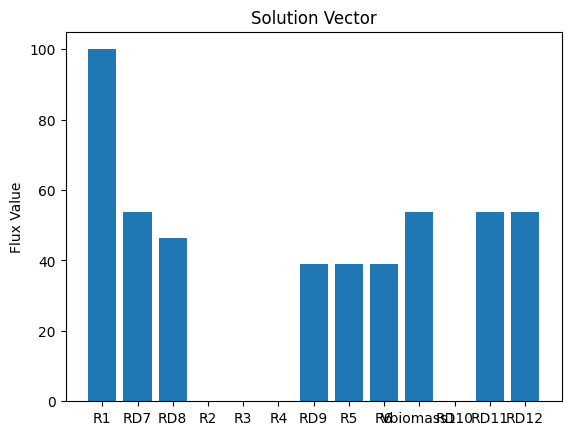

In [3]:
#FBA for maximum Biomass growth of  organism 1

b=np.zeros(m) # Right-hand side of SV=0
obj=np.zeros(n) # Initialize Objective function vector to zero
LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
LB=0*np.ones(n) # Set of lower bounds, initialize to zero
UB=LARGE*np.ones(n) # Set of upper bounds, initialize to LARGE
UB[0]=100 #upper boundary of 100 for Vglc that here is represented by reaction R1
LBUB = np.transpose(np.stack((LB,UB),axis=0)) # Combine LB, UB into set of pairs [LB,UB]

obj[9]=-1 # Define objective function (Vbiomass). Default of optimizer is "minimize", so a -1 will lead to maximization
print("Objetive function:", obj)
print("IMPLEMENT OPTIMIZATION:")
options = {"disp": False}
solution = linprog(c=obj, A_eq=S1, b_eq=b, bounds=LBUB, options=options) # max c*v, given Sv=b, LB < v <UB

print("Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties): ",solution.status)
print("Optimal value: ",solution.fun)
print("Solution vector: ", solution.x)

max_biomass=-solution.fun
print("maximum biomass production:", max_biomass)

#fluxes values obtained applying FBA
v_pos = np.arange(n)
plt.bar(v_pos, solution.x, align='center')
plt.xticks(v_pos, reacs)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

STOICHIOMETRIC MATRIX ORGANISM 2 -->S2.

---



STOICHIOMETRIC MATRIX S2


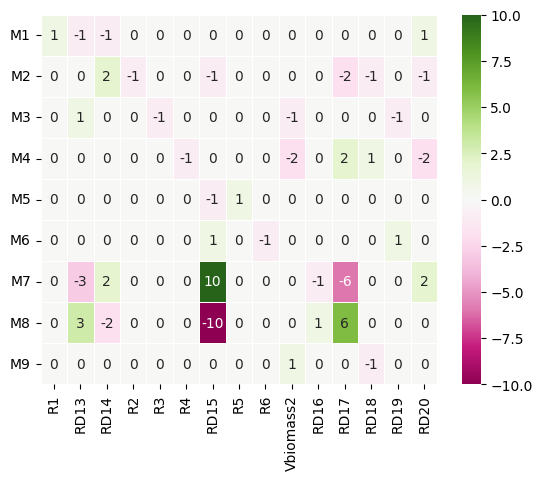

In [4]:
#STOICHIOMETRIC MATRIX ORGANISM 2 -->S2.
reacs2 =["R1","RD13","RD14","R2","R3","R4","RD15","R5","R6","Vbiomass2","RD16","RD17","RD18","RD19","RD20"]
metabs2 = ["M1","M2","M3","M4","M5","M6","M7","M8","M9"]

n2 = len(reacs2)
m2 = len(metabs2)

S2=np.array([[1  , -1  ,  -1 ,    0  ,   0  ,   0  ,   0  ,   0  ,   0   ,  0  ,   0   ,  0   ,  0 ,   0 ,   1],
[0  ,  0   ,  2   , -1   ,  0   ,  0   , -1  ,   0  ,   0  ,   0   ,  0  ,  -2  ,   -1,  0  , -1 ],
[0  ,  1  ,   0   ,  0  ,  -1   ,  0  ,   0  ,   0  ,   0  ,  -1   ,  0   ,  0  ,   0,   -1,   0],
[0  ,  0  ,   0   ,  0   ,  0  ,  -1   ,  0  ,   0   ,  0  ,  -2   ,  0   ,  2  ,   1,   0,   -2],
[0  ,  0  ,   0   ,  0   ,  0   ,  0  ,  -1   ,  1   ,  0  ,   0   ,  0  ,   0   ,  0,   0,   0],
[0  ,  0  ,   0   ,  0  ,   0   ,  0   ,  1   ,  0  ,  -1  ,   0   ,  0  ,   0   ,  0,   1,    0],
[0  , -3  ,   2  ,   0  ,   0   ,  0   , 10  ,   0  ,  0   ,  0  ,  -1  ,  -6  ,  0,    0,    2],
[0  ,  3  ,  -2  ,   0   ,  0   ,  0  , -10  ,   0  ,   0   ,  0  ,   1   ,  6  ,  0,   0,    0],
[0  ,  0  ,   0  ,   0   ,  0   ,  0  ,   0   ,  0   ,  0   ,  1   ,  0   ,  0   , -1,    0,  0]])

print("STOICHIOMETRIC MATRIX S2")
colormap = sns.color_palette("Greens")
sns.heatmap(S2, annot=True,  linewidths=.5, xticklabels=reacs2,yticklabels=metabs2,cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

FBA for maximum Biomass growth of organism 2 (S2)

---



Objetive function: [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
IMPLEMENT OPTIMIZATION:
Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties):  0
Optimal value:  -45.833333333333336
Solution vector:  [100.          45.83333333  54.16666667   0.           0.
   0.          16.66666667  16.66666667  16.66666667  45.83333333
   0.          22.91666667  45.83333333   0.           0.        ]
maximum biomass production: 45.833333333333336


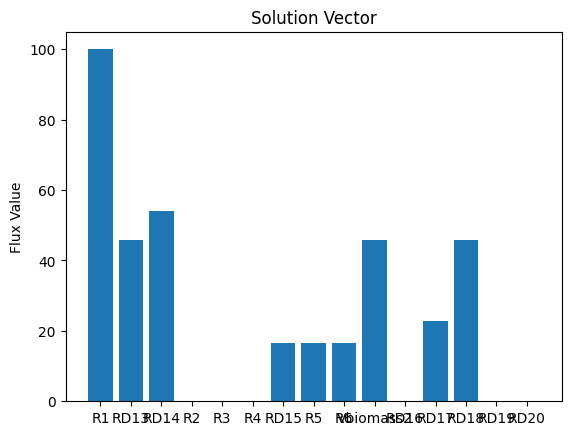

In [5]:
#FBA for maximum Biomass growth of organism 2 (S2)

b2=np.zeros(m2) # Right-hand side of SV=0
obj2=np.zeros(n2) # Initialize Objective function vector to zero
LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
LB=0*np.ones(n2) # Set of lower bounds, initialize to zero
UB=LARGE*np.ones(n2) # Set of upper bounds, initialize to LARGE
UB[0]=100 #upper boundary of 100 for Vglc that here is represented by reaction R1
LBUB = np.transpose(np.stack((LB,UB),axis=0)) # Combine LB, UB into set of pairs [LB,UB]

obj2[9]=-1 # Define objective function. Default of optimizer is "minimize", so a -1 will lead to maximization
print("Objetive function:", obj2)
print("IMPLEMENT OPTIMIZATION:")
options = {"disp": False}
solution = linprog(c=obj2, A_eq=S2, b_eq=b2, bounds=LBUB, options=options) # max c*v, given Sv=b, LB < v <UB

print("Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties): ",solution.status)
print("Optimal value: ",solution.fun)
print("Solution vector: ", solution.x)

max_biomass=-solution.fun
print("maximum biomass production:", max_biomass)

#fluxes values obtained applying FBA
v_pos = np.arange(n2)
plt.bar(v_pos, solution.x, align='center')
plt.xticks(v_pos, reacs2)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

This part constructs the matrices S1_union and S2_union, which are expanded
versions of the original matrices S1 and S2, respectively.
The expanded matrices have the same dimensions, determined by the combined set of all unique metabolites (union_metabs)
 and all unique reactions (union_reacs) from both S1 and S2. This unification ensures that both matrices have the same shape.


---



STOICHIOMETRIC MATRIX S1_union


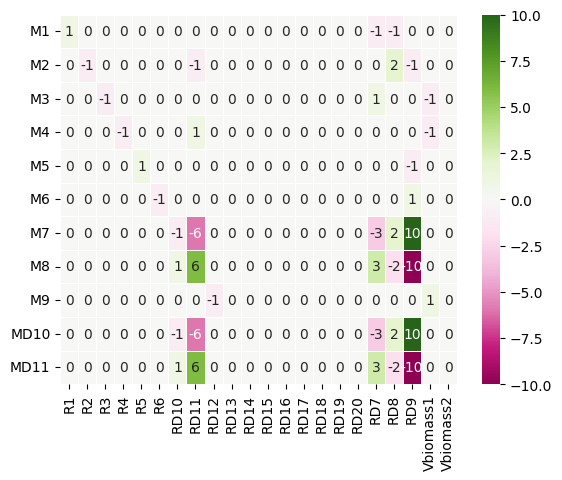

STOICHIOMETRIC MATRIX S2_union


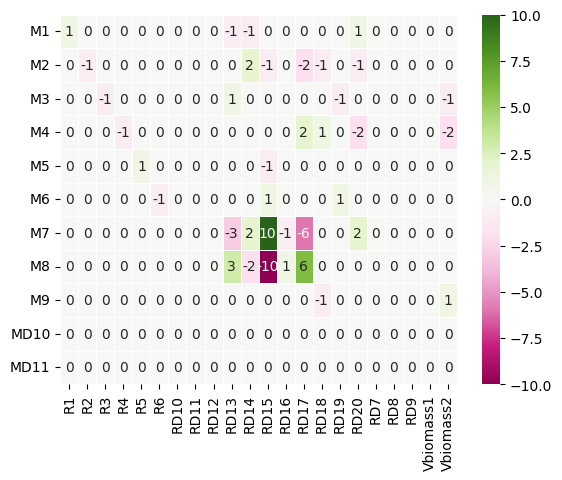

In [6]:
#This part constructs the matrices S1_union and S2_union, which are expanded versions of the original matrices S1 and S2, respectively.
#The expanded matrices have the same dimensions, determined by the combined set of all unique metabolites (union_metabs)
# and all unique reactions (union_reacs) from both S1 and S2. This unification ensures that both matrices have the same shape.

reacs =["R1","RD7","RD8","R2","R3","R4","RD9","R5","R6","Vbiomass1","RD10","RD11","RD12"]
reacs2 =["R1","RD13","RD14","R2","R3","R4","RD15","R5","R6","Vbiomass2","RD16","RD17","RD18","RD19","RD20"]
metabs = ["M1","M2","M3","M4","M5","M6","M7","M8","MD10","MD11","M9"]
metabs2 = ["M1","M2","M3","M4","M5","M6","M7","M8","M9"]


# Union of reactions and metabolites
union_reacs = sorted(set(reacs) | set(reacs2))
union_reacs_length=len(union_reacs)
union_metabs = sorted(set(metabs) | set(metabs2))

# Map from reaction name and metabolite name to index in the union list
reac_to_index = {reac: index for index, reac in enumerate(union_reacs)}
metab_to_index = {metab: index for index, metab in enumerate(union_metabs)}

# Initialize the new matrices with zeros
S1_union = np.zeros((len(union_metabs), len(union_reacs)))
S2_union = np.zeros((len(union_metabs), len(union_reacs)))

# Populate S1_union
for i in range(len(metabs)):
    for j in range(len(reacs)):
        S1_union[metab_to_index[metabs[i]], reac_to_index[reacs[j]]] = S1[i, j]

# Populate S2_union
for i in range(len(metabs2)):
     for j in range(len(reacs2)):
        S2_union[metab_to_index[metabs2[i]], reac_to_index[reacs2[j]]] = S2[i, j]

print("STOICHIOMETRIC MATRIX S1_union")
# Visualize S1_union matrix to verify correct placement
colormap = sns.color_palette("Greens")
sns.heatmap(S1_union, annot=True,  linewidths=.5, xticklabels=union_reacs ,yticklabels=union_metabs,cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

print("STOICHIOMETRIC MATRIX S2_union")
# Visualize S1_union matrix to verify correct placement
colormap = sns.color_palette("Greens")
sns.heatmap(S2_union, annot=True,  linewidths=.5, xticklabels=union_reacs ,yticklabels=union_metabs,cmap="PiYG")
plt.yticks(rotation=0)
plt.show()


 This script generates a consensus biomass reaction for organisms 1 and 2 by averaging the biomass reaction's coefficients of Vbiomass1 and Vbiomass2.

---




STOICHIOMETRIC MATRIX S1_union WITH INTERSECTION


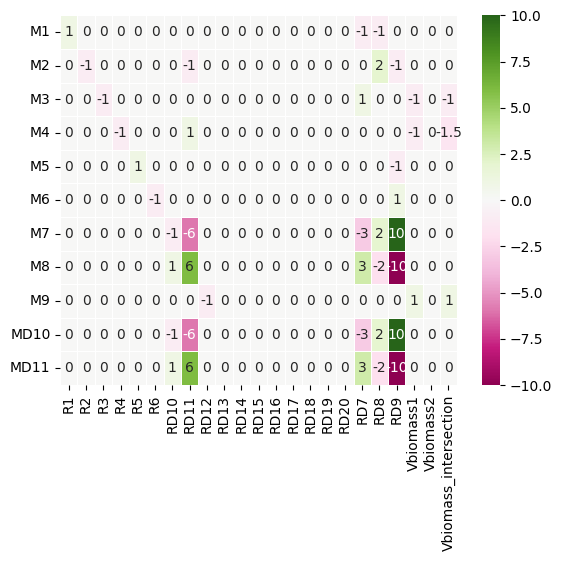

STOICHIOMETRIC MATRIX S2_union WITH INTERSECTION


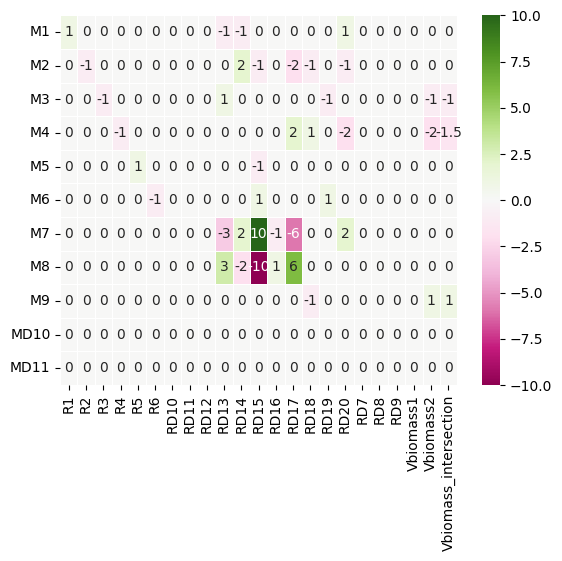

In [7]:
# This script generates a consensus biomass reaction for organisms 1 and 2 by averaging the biomass reaction's coefficients of Vbiomass1 and Vbiomass2.

# Define indices for the reactions Vbiomass1 and Vbiomass2
idx_Vbiomass1 = reac_to_index['Vbiomass1']
idx_Vbiomass2 = reac_to_index['Vbiomass2']

# Extract the columns for Vbiomass1 and Vbiomass2 from S1 and S2 respectively
column_Vbiomass1 = S1_union[:, idx_Vbiomass1]
column_Vbiomass2 = S2_union[:, idx_Vbiomass2]

# Calculate the consensus biomass for Vbiomass1 and Vbiomass2
Vbiomass_intersection = np.zeros_like(column_Vbiomass1)
for i, (v1, v2) in enumerate(zip(column_Vbiomass1, column_Vbiomass2)):
    Vbiomass_intersection[i] = (v1 + v2)/2   #consensus biomass: the new sahred biomass is the average of the coefficients of the 2 biomasses

# Append the new reaction to union_reacs and update the matrices
union_reacs.append('Vbiomass_intersection')
reac_to_index['Vbiomass_intersection'] = len(union_reacs) - 1  # New index for the new reaction

# Add the new intersection column to S1_union and S2_union
S1_union = np.column_stack((S1_union, Vbiomass_intersection))
S2_union = np.column_stack((S2_union, Vbiomass_intersection))

# Visualize S1_union matrix to verify correct placement
print("STOICHIOMETRIC MATRIX S1_union WITH INTERSECTION")
sns.heatmap(S1_union, annot=True, linewidths=.5, xticklabels=union_reacs, yticklabels=union_metabs, cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

# Visualize S2_union matrix to verify correct placement
print("STOICHIOMETRIC MATRIX S2_union WITH INTERSECTION")
sns.heatmap(S2_union, annot=True, linewidths=.5, xticklabels=union_reacs, yticklabels=union_metabs, cmap="PiYG")
plt.yticks(rotation=0)
plt.show()



Remove Vbiomass1 and Vbiomass2 from the S1_union and S2_union to only keep Vbiomass_intersection for both organisms

['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'RD10', 'RD11', 'RD12', 'RD13', 'RD14', 'RD15', 'RD16', 'RD17', 'RD18', 'RD19', 'RD20', 'RD7', 'RD8', 'RD9', 'Vbiomass_intersection']
{'R1': 0, 'R2': 1, 'R3': 2, 'R4': 3, 'R5': 4, 'R6': 5, 'RD10': 6, 'RD11': 7, 'RD12': 8, 'RD13': 9, 'RD14': 10, 'RD15': 11, 'RD16': 12, 'RD17': 13, 'RD18': 14, 'RD19': 15, 'RD20': 16, 'RD7': 17, 'RD8': 18, 'RD9': 19, 'Vbiomass_intersection': 20}
FINAL STOICHIOMETRIC MATRIX S1_union


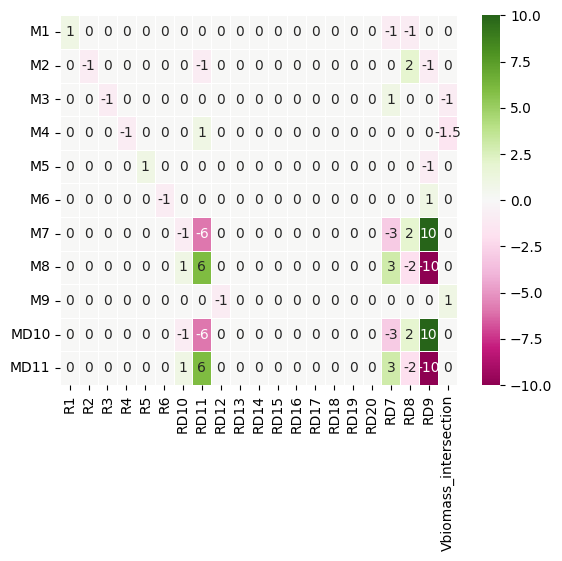

FINAL STOICHIOMETRIC MATRIX S2_union


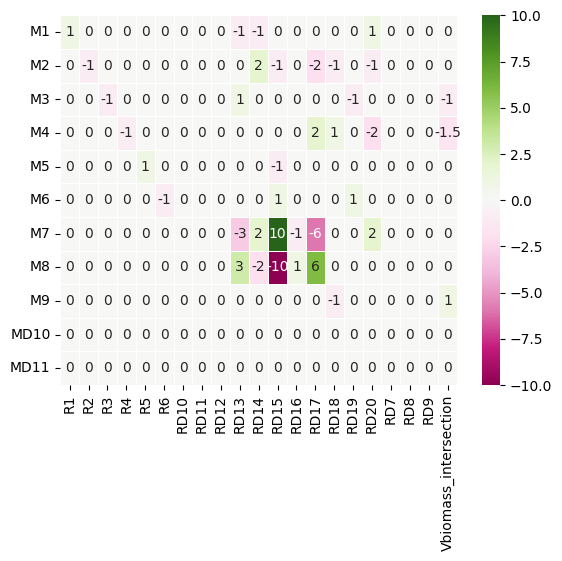

In [8]:
#REMOVE Vbiomass1 and Vbiomass2 from the S1_union and S2_union to only keep Vbiomass_intersection and then sort the columns of the new matrices again for consistency

# Map from reaction name and metabolite name to index in the union list
reac_to_index = {reac: index for index, reac in enumerate(union_reacs)}
metab_to_index = {metab: index for index, metab in enumerate(union_metabs)}

# Remove 'Vbiomass1' and 'Vbiomass2'
union_reacs = [reac for reac in union_reacs if reac not in ('Vbiomass1', 'Vbiomass2')]

# Sort and re-index
union_reacs1 = sorted(union_reacs) #union reacs sorted without vbiomass1 and vbiomass2
print(union_reacs1)
reac_to_index1 = {reac: index for index, reac in enumerate(union_reacs1)}
print(reac_to_index1)

# Initialize and populate the updated union matrices
S1_union_updated = np.zeros((len(union_metabs), len(union_reacs1)))
S2_union_updated = np.zeros((len(union_metabs), len(union_reacs1)))
for metab in union_metabs: #same metabolites of before
    for reac in union_reacs1: #new reactions sorted and without Vbiomass1 aand Vbiomass2
        old_index = reac_to_index.get(reac)
        if reac=='Vbiomass_intersection':
          S1_union_updated[metab_to_index[metab], reac_to_index1[reac]] = Vbiomass_intersection[metab_to_index[metab]]
          S2_union_updated[metab_to_index[metab], reac_to_index1[reac]] = Vbiomass_intersection[metab_to_index[metab]]
        elif old_index is not None:
            S1_union_updated[metab_to_index[metab], reac_to_index1[reac]] = S1_union[metab_to_index[metab], old_index]
            S2_union_updated[metab_to_index[metab], reac_to_index1[reac]] = S2_union[metab_to_index[metab], old_index]

# Replace the matrices with the new union matrices with Vbiomass_intersection instead of Vbiomass1 and Vbiomass2
S1_union = S1_union_updated
S2_union = S2_union_updated

union_reacs=union_reacs1

# Visualization
print("FINAL STOICHIOMETRIC MATRIX S1_union")
sns.heatmap(S1_union, annot=True, linewidths=.5, xticklabels=union_reacs, yticklabels=union_metabs, cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

print("FINAL STOICHIOMETRIC MATRIX S2_union")
sns.heatmap(S2_union, annot=True, linewidths=.5, xticklabels=union_reacs, yticklabels=union_metabs, cmap="PiYG")
plt.yticks(rotation=0)
plt.show()


FBA for maximum Biomass (V_biomass_interesection) growth of organism 1 (S1_union!!!)

---



Objetive function: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -1.]
IMPLEMENT OPTIMIZATION:
Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties):  0
Optimal value:  -44.897959183673464
Solution vector:  [100.           0.           0.           0.          42.85714286
  42.85714286   0.          67.34693878  44.89795918   0.
   0.           0.           0.           0.           0.
   0.           0.          44.89795918  55.10204082  42.85714286
  44.89795918]
maximum biomass production: 44.897959183673464


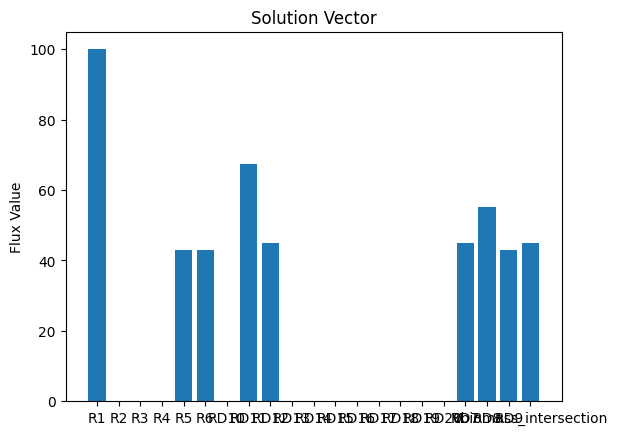

In [9]:
##FBA for maximum Biomass growth of organism 1 (S1_union!!!) NOW we have the consensus biomass Vbiomass_intersection instead of the original Vbiomass1
#NB: WE GET A DIFFERENT FBA FROM THE ORIGINAL S1 BECAUSE NOW WE USE THE CONSENSUS BIOMASS INSTEAD OF THE ORIGINAL BIOMASS

n2 = len(union_reacs)
m2 = len(union_metabs)
b2=np.zeros(m2) # Right-hand side of SV=0
obj2=np.zeros(n2) # Initialize Objective function vector to zero
LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
LB=0*np.ones(n2) # Set of lower bounds, initialize to zero
UB=LARGE*np.ones(n2) # Set of upper bounds, initialize to LARGE
UB[0]=100  #the reaction R1 is the glucose reaction
LBUB = np.transpose(np.stack((LB,UB),axis=0)) # Combine LB, UB into set of pairs [LB,UB]

obj2[20]=-1 # Define objective function. Default of optimizer is "minimize", so a -1 will lead to maximization
print("Objetive function:", obj2)
print("IMPLEMENT OPTIMIZATION:")
options = {"disp": False}
solution = linprog(c=obj2, A_eq=S1_union, b_eq=b2, bounds=LBUB, options=options) # max c*v, given Sv=b, LB < v <UB
print("Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties): ",solution.status)
print("Optimal value: ",solution.fun)
print("Solution vector: ", solution.x)

max_biomass=-solution.fun
print("maximum biomass production:", max_biomass)

#fluxes values obtained applying FBA
n2 = len(union_reacs)
m2 = len(union_metabs)
v_pos = np.arange(n2)
plt.bar(v_pos, solution.x, align='center')
plt.xticks(v_pos, union_reacs)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

FBA for maximum Biomass growth of organism 2 (S2_union!!!)

---



Objetive function: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. -1.]
IMPLEMENT OPTIMIZATION:
Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties):  0
Optimal value:  -53.01204819277108
Solution vector:  [100.           0.           0.           0.          14.45783133
  14.45783133   0.           0.           0.          53.01204819
  46.98795181  14.45783133   0.          13.25301205  53.01204819
   0.           0.           0.           0.           0.
  53.01204819]
maximum biomass production: 53.01204819277108


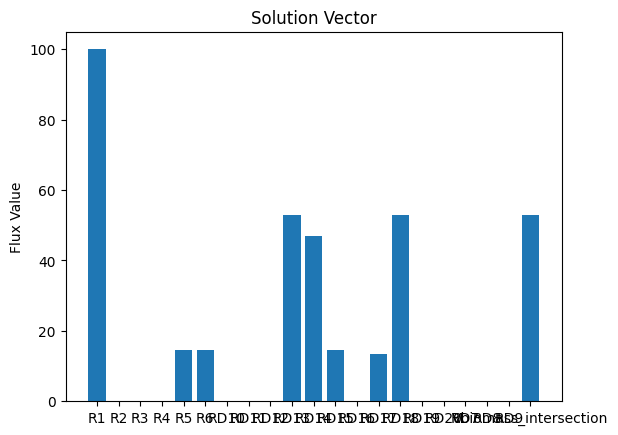

In [10]:
##FBA for maximum Biomass growth of organism 1 (S1_union!!!) NOW we have the consensus biomass Vbiomass_intersection instead of the original Vbiomass1
#NB: WE GET A DIFFERENT FBA FROM THE ORIGINAL S1 BECAUSE NOW WE USE THE CONSENSUS BIOMASS INSTEAD OF THE ORIGINAL BIOMASS

n2 = len(union_reacs)
m2 = len(union_metabs)
b2=np.zeros(m2) # Right-hand side of SV=0
obj2=np.zeros(n2) # Initialize Objective function vector to zero
LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
LB=0*np.ones(n2) # Set of lower bounds, initialize to zero
UB=LARGE*np.ones(n2) # Set of upper bounds, initialize to LARGE
UB[0]=100 #R1: reaction for the glucose
LBUB = np.transpose(np.stack((LB,UB),axis=0)) # Combine LB, UB into set of pairs [LB,UB]

obj2[20]=-1 # Define objective function. Default of optimizer is "minimize", so a -1 will lead to maximization
print("Objetive function:", obj2)
print("IMPLEMENT OPTIMIZATION:")
options = {"disp": False}
solution = linprog(c=obj2, A_eq=S2_union, b_eq=b2, bounds=LBUB, options=options) # max c*v, given Sv=b, LB < v <UB
#print(solution)

print("Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties): ",solution.status)
print("Optimal value: ",solution.fun)
print("Solution vector: ", solution.x)
max_biomass=-solution.fun
print("maximum biomass production:", max_biomass)

#fluxes values obtained applying FBA
n2 = len(union_reacs)
m2 = len(union_metabs)
v_pos = np.arange(n2)
plt.bar(v_pos, solution.x, align='center')
plt.xticks(v_pos, union_reacs)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

Create a ordered dictionary for the reactions used as columns in the final matrices S1_union and S2_union

---




In [11]:
from collections import OrderedDict
# Variables already defined:
# union_metabs, union_reacs, reacs, reacs2, metabs, metabs2, S1, S2
# Along with the necessary mappings: metab_to_index, metab_to_index_2, reac_to_index, reac_to_index_2

# Initialize the ordered dictionary
all_reactions_columns_ordered = OrderedDict()

for reaction in union_reacs:
  if reaction in reacs:
    column=S1_union[:,reac_to_index1[reaction]]
  elif reaction in reacs2:
    column=S2_union[:,reac_to_index1[reaction]]
  elif reaction=='Vbiomass_intersection':
      column=Vbiomass_intersection
  all_reactions_columns_ordered[reaction]=column


# Dictionary with all reactions as keys and their columns as values in the order of union_reacs
print(all_reactions_columns_ordered)
print(len(all_reactions_columns_ordered))


OrderedDict([('R1', array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])), ('R2', array([ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R3', array([ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R4', array([ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R5', array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])), ('R6', array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.])), ('RD10', array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0., -1.,  1.])), ('RD11', array([ 0., -1.,  0.,  1.,  0.,  0., -6.,  6.,  0., -6.,  6.])), ('RD12', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.])), ('RD13', array([-1.,  0.,  1.,  0.,  0.,  0., -3.,  3.,  0.,  0.,  0.])), ('RD14', array([-1.,  2.,  0.,  0.,  0.,  0.,  2., -2.,  0.,  0.,  0.])), ('RD15', array([  0.,  -1.,   0.,   0.,  -1.,   1.,  10., -10.,   0.,   0.,   0.])), ('RD16', array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.])), ('RD17', array([ 0., -2.,  0.,  2.,  0.,  0., -6

Function to trasnform a matrix into a binary string

---



In [12]:
#Transformation from a matrtix into binary string

def matrix_to_binary_string(organism):
  binary_organism = ''.join(['1' if np.any(organism[:, i] != 0) else '0' for i in range(organism.shape[1])])
  return binary_organism

# S1_union and S2_union are your stoichiometric matrices
binary_string_S1 = matrix_to_binary_string(S1_union)
binary_string_S2 = matrix_to_binary_string(S2_union)

print("Binary string representation of S1:", binary_string_S1)
print("Binary string representation of S2:", binary_string_S2)

Binary string representation of S1: 111111111000000001111
Binary string representation of S2: 111111000111111110001


Function to tranform a binary string back to its original stoichiometric matrix

---



111111111000000001111
OrderedDict([('R1', array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])), ('R2', array([ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R3', array([ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R4', array([ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R5', array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])), ('R6', array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.])), ('RD10', array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0., -1.,  1.])), ('RD11', array([ 0., -1.,  0.,  1.,  0.,  0., -6.,  6.,  0., -6.,  6.])), ('RD12', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.])), ('RD13', array([-1.,  0.,  1.,  0.,  0.,  0., -3.,  3.,  0.,  0.,  0.])), ('RD14', array([-1.,  2.,  0.,  0.,  0.,  0.,  2., -2.,  0.,  0.,  0.])), ('RD15', array([  0.,  -1.,   0.,   0.,  -1.,   1.,  10., -10.,   0.,   0.,   0.])), ('RD16', array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.])), ('RD17', array([ 0., -2., 

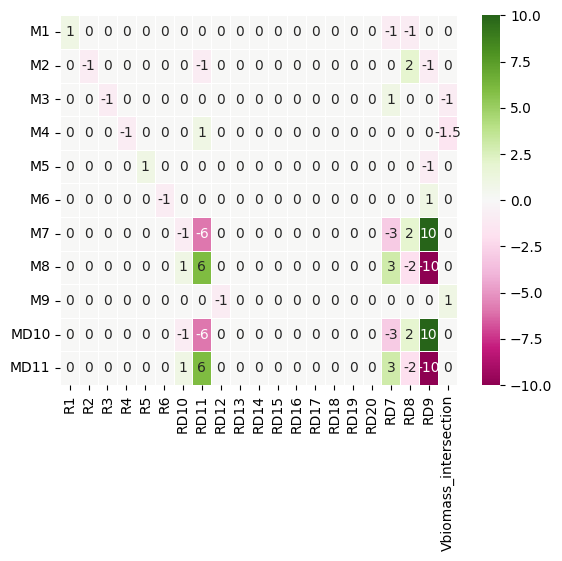

OrderedDict([('R1', array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])), ('R2', array([ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R3', array([ 0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R4', array([ 0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])), ('R5', array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])), ('R6', array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.])), ('RD10', array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0., -1.,  1.])), ('RD11', array([ 0., -1.,  0.,  1.,  0.,  0., -6.,  6.,  0., -6.,  6.])), ('RD12', array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.])), ('RD13', array([-1.,  0.,  1.,  0.,  0.,  0., -3.,  3.,  0.,  0.,  0.])), ('RD14', array([-1.,  2.,  0.,  0.,  0.,  0.,  2., -2.,  0.,  0.,  0.])), ('RD15', array([  0.,  -1.,   0.,   0.,  -1.,   1.,  10., -10.,   0.,   0.,   0.])), ('RD16', array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.])), ('RD17', array([ 0., -2.,  0.,  2.,  0.,  0., -6

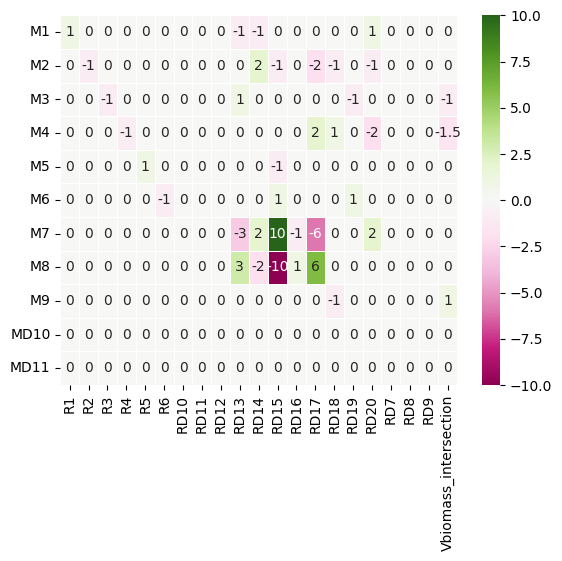

In [13]:
## function to transform the binary string back to its stoichiometric matrix!!!

def string_to_matrix(binary_string, all_reactions_columns_ordered, num_metabolites):
    # Initialize an empty matrix with the correct dimensions
    matrix = np.zeros((num_metabolites, len(binary_string)))
    # Iterate over each character in the binary string
    for i, char in enumerate(binary_string):
        if char == '1':
            # If the character is '1', add the corresponding column from the dictionary
            matrix[:, i] = all_reactions_columns_ordered[union_reacs[i]]
        # If the character is '0', the column remains zeros (already initialized)
    return matrix

# Example usage for S1_union:
individual_string = binary_string_S1  # This should be the actual binary string representation of an individual
num_metabolites = len(union_metabs)
print(individual_string)
print(all_reactions_columns_ordered)
print(union_reacs)
S1_reconstructed = string_to_matrix(individual_string, all_reactions_columns_ordered, num_metabolites)
print(" S1 STOICHIOMETRIC MATRIX")
colormap = sns.color_palette("Greens")
sns.heatmap(S1_reconstructed, annot=True,  linewidths=.5, xticklabels=union_reacs,yticklabels=union_metabs,cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

# Example usage for S1_union:
individual_string = binary_string_S2  # This should be the actual binary string representation of an individual
num_metabolites = len(union_metabs)
print(all_reactions_columns_ordered)
print(union_reacs)
S1_reconstructed = string_to_matrix(individual_string, all_reactions_columns_ordered, num_metabolites)
print(" S2 STOICHIOMETRIC MATRIX")
colormap = sns.color_palette("Greens")
sns.heatmap(S1_reconstructed, annot=True,  linewidths=.5, xticklabels=union_reacs,yticklabels=union_metabs,cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

#GENETIC ALGORITHM FOR THE EVOLUTION OF A POPULATION

---



---



In [14]:
####GENETIC ALGORITHM FOR THE EVOLUTION OF A POPULATION####
def genetic_algorithm(pop_size=40, genome_length=len(union_reacs), max_generations=200, mutation_rate=0.01, crossover_rate=0.00, individual1=S1_union, individual2=S2_union):

    num_metabolites = len(union_metabs)
    num_reactions=len(union_reacs)

    def matrix_to_binary_string(organism):
      binary_organism = ''.join(['1' if np.any(organism[:, i] != 0) else '0' for i in range(organism.shape[1])])
      return binary_organism

    def string_to_matrix(binary_string):
      # Initialize an empty matrix with the correct dimensions
      matrix = np.zeros((num_metabolites, len(binary_string)))
      # Iterate over each character in the binary string
      for i, char in enumerate(binary_string):
        if char == '1':
          # If the character is '1', add the corresponding column from the dictionary
          matrix[:, i] = all_reactions_columns_ordered[union_reacs[i]]
          # If the character is '0', the column remains zeros (already initialized)
      return matrix

    # Function to evaluate genome fitness
    def fitness(organism_matrix,individual2):
        b=np.zeros(num_metabolites) # Right-hand side of SV=0
        obj=np.zeros(num_reactions) # Initialize Objective function vector to zero
        LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
        LB=0*np.ones(num_reactions) # Set of lower bounds, initialize to zero
        UB=LARGE*np.ones(num_reactions) # Set of upper bounds, initialize to LARGE
        LBUB = np.transpose(np.stack((LB,UB),axis=0)) # Combine LB, UB into set of pairs [LB,UB]
        idx_Vbiomass_intersection = union_reacs.index('Vbiomass_intersection')
        Vbiomass_intersection_non_zero = np.any(organism_matrix[:, idx_Vbiomass_intersection] != 0)
        obj_function = [0] * len(union_reacs)

        target_binary_string=matrix_to_binary_string(individual2)
        organism_binary_string = matrix_to_binary_string(organism_matrix)

        # Calculate the similarity between individual1 and individual2
        similarity_factor = sum(1 for org_char, target_char in zip(organism_binary_string, target_binary_string) if org_char == target_char)

        if Vbiomass_intersection_non_zero:
          obj_function[idx_Vbiomass_intersection] = -1  # Half weight if combining by averaging, use -1 for summing
          solution = linprog(c=obj_function, A_eq=organism_matrix, b_eq=b, bounds=LBUB, options=options)
          solution_vector = np.array(solution.x)
          biomass = -solution.fun  # Negative because we are maximizing
          optimal_biomasss=biomass
          if optimal_biomasss > 5:  #threshold for having individuals with some minimum growth
            optimal_biomass = 1
          else:
            optimal_biomass=0

          adjusted_fitness = optimal_biomass * similarity_factor
          return adjusted_fitness

        else:
          return 0

    # Function to introduce mutations
    def mutate(organism_binary, mutation_rate):
        def mutate_gene(reaction):
            if random.random() < mutation_rate:
                return '1' if reaction == '0' else '0'
            return reaction
        mutated_organism = ''.join(mutate_gene(reaction) for reaction in organism_binary)
        return mutated_organism

    def crossover(parent1, parent2, crossover_rate, genome_length):
      if random.random() < crossover_rate:
        crossover_point = random.randint(1, genome_length - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2
      return parent1, parent2

    def hamming_distance(str1, str2):
      return sum(c1 != c2 for c1, c2 in zip(str1, str2))

    def average_hamming_distance(population):
      distances = []
      n = len(population)
      for i in range(n):
          for j in range(i + 1, n):
              distances.append(hamming_distance(population[i], population[j]))
      return np.mean(distances)

    def bit_frequencies(population):
      n = len(population)
      length = len(population[0])
      frequencies = np.zeros(length)
      for individual in population:
          for i, bit in enumerate(individual):
              if bit == '1':
                frequencies[i] += 1
      return frequencies / n

    # Initializing the population
    num_individuals = pop_size
    #starting binary string (S1_union to S1_binary)
    S1_binary = matrix_to_binary_string(individual1)
    population = []
    for _ in range(num_individuals):
      population.append(S1_binary)

    # Track fitness over generations
    fitness_tracking = np.zeros((max_generations, pop_size))
    offspring_replication_counts = {}
    # Tracking death balances reproduction at each step
    population_sizes = []
    generations=[]

    # EVOLUTION PROCESS:
    for generation in range(max_generations):
        # Compute fitness for each individual
        fitness_scores = [fitness(string_to_matrix(individual),individual2) for individual in population]
        fitness_tracking[generation, :] = fitness_scores
        # Generate offspring based on fitness
        offspring_pool = []
        total_fitness = sum(fitness_scores)
        if total_fitness == 0: total_fitness = 1  # Prevent division by zero
        while len(offspring_pool) < pop_size:
            for individual, fit in zip(population, fitness_scores):
              if total_fitness > 0:
                offspring_count = int((fit / total_fitness) * pop_size) + 1
              else:
                offspring_count = 1  # O un valore base appropriato
              offspring_pool.extend([individual] * offspring_count)
              offspring_replication_counts[individual] = offspring_count

        # Maintain population size. Population 1 is the population before any mutation or crossover
        population1 = random.sample(offspring_pool, pop_size) if len(offspring_pool) > pop_size else offspring_pool

        #Crossover
        pop_crossover = []
        while len(pop_crossover) < pop_size:
            parent1, parent2 = random.sample(population1, 2)
            child1, child2 = crossover(parent1, parent2, crossover_rate, genome_length)
            pop_crossover.extend([child1, child2])

        # Population mutation + crossover: population2 is the final population for the new generation obtain from selection, crossover and mutation
        population2 = [mutate(individual, mutation_rate) for individual in pop_crossover]
        population=population2
        # Tracking death balances reproduction at each step
        population_sizes.append(len(population2))
        generations.append(population2)

    # Calculate and return the evolution metrics
    # Calculate average Hamming distances
    avg_distances = [average_hamming_distance(gen) for gen in generations]
    # Calculate bit frequencies for each generation
    bit_freqs = [bit_frequencies(gen) for gen in generations]
    avg_fitness = np.mean(fitness_tracking, axis=1)
    max_fitness = np.max(fitness_tracking, axis=1)
    generation_numbers = np.arange(max_generations)
    std_fitness = np.std(fitness_tracking, axis=1)

    return generation_numbers, avg_fitness, max_fitness, population1, population2, population_sizes, std_fitness, avg_distances, bit_freqs


In [15]:
##RUN EVOLUTION
generation_numbers, avg_fitness, max_fitness, population1, population2, population_sizes, std_fitness, avg_distances, bit_freqs=genetic_algorithm(pop_size=40, genome_length=len(union_reacs), max_generations=500, mutation_rate=0.001, crossover_rate=0.00, individual1=S1_union, individual2=S2_union)

In [16]:
#some results
print(avg_fitness)
print(max_fitness)
print(population1)
print(population2)
print(population_sizes)
print(std_fitness)

[ 7.     7.     6.975  7.     7.05   7.075  7.05   7.35   7.4    7.35
  7.825  8.05   8.425  8.575  8.65   8.8    8.7    9.     9.     9.
  9.     9.     9.     8.95   8.95   8.975  9.     9.     8.875  8.875
  9.25   9.275  9.45   9.8    9.7   10.025 10.2   10.4   10.75  11.2
 11.25  11.65  11.5   11.5   11.75  11.775 11.975 11.925 12.    12.
 11.975 11.925 11.925 11.975 11.975 11.7   12.025 11.675 11.425 11.7
 11.725 12.075 12.125 12.325 12.325 12.35  12.175 12.175 11.675 11.4
 11.375 11.375 11.925 12.65  12.825 12.85  12.95  13.    13.    12.975
 13.    12.975 13.    13.    13.    12.9   12.95  12.925 12.7   13.05
 12.85  13.2   13.45  13.65  13.75  13.825 13.525 13.25  13.2   13.575
 13.575 14.    14.    14.    13.95  13.25  13.925 13.625 13.625 14.
 13.975 13.625 14.    14.05  14.05  13.725 14.025 14.05  14.125 14.35
 14.65  14.4   14.55  15.    14.975 14.65  15.05  15.075 14.75  15.05
 15.225 15.35  15.625 15.7   16.075 15.75  15.65  15.475 16.675 16.775
 16.8   16.925 16.95  16.

In [17]:
#### expected mutations #####

#population1 = population before mutations
original_sequence = population1[3]
#population2 = population after mutation and crossover
# Access the corresponding mutated sequence from population2
mutated_sequence = population2[3]

# Compare the original and mutated sequences
mutations = sum(1 for original, mutated in zip(original_sequence, mutated_sequence) if original != mutated)

# Calculate expected mutations
mutation_rate=0.001
expected_mutations = len(original_sequence) * mutation_rate

# Output the analysis
print(f"Original sequence: {original_sequence}")
print(f"Mutated sequence:  {mutated_sequence}")
print(f"Total mutations:   {mutations}")
print(f"Expected mutations (approximately): {expected_mutations:.2f}")
print(f"Mutation rate:   {mutation_rate * 100}%")


Original sequence: 111111000111111110001
Mutated sequence:  111111000111111110001
Total mutations:   0
Expected mutations (approximately): 0.02
Mutation rate:   0.1%


In [18]:
#fitness function of the genetic algorithm

def fitness(organism_matrix,individual2):
        num_metabolites = organism_matrix.shape[0]
        num_reactions=organism_matrix.shape[1]
        b=np.zeros(num_metabolites) # Right-hand side of SV=0
        obj=np.zeros(num_reactions) # Initialize Objective function vector to zero
        LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
        LB=0*np.ones(num_reactions) # Set of lower bounds, initialize to zero
        UB=LARGE*np.ones(num_reactions) # Set of upper bounds, initialize to LARGE
        LBUB = np.transpose(np.stack((LB,UB),axis=0)) # Combine LB, UB into set of pairs [LB,UB]
        idx_Vbiomass_intersection = union_reacs.index('Vbiomass_intersection')
        Vbiomass_intersection_non_zero = np.any(organism_matrix[:, idx_Vbiomass_intersection] != 0)
        obj_function = [0] * len(union_reacs)

        organism_binary_string = matrix_to_binary_string(organism_matrix)
        target_binary_string=matrix_to_binary_string(individual2)

        # Calculate the similarity
        similarity_factor = sum(1 for org_char, target_char in zip(organism_binary_string, target_binary_string) if org_char == target_char)

        if Vbiomass_intersection_non_zero:
          obj_function[idx_Vbiomass_intersection] = -1
          solution = linprog(c=obj_function, A_eq=organism_matrix, b_eq=b, bounds=LBUB, options=options)
          solution_vector = np.array(solution.x)
          biomass = -solution.fun  # Negative because we are maximizing
          optimal_biomasss=biomass
          if optimal_biomasss > 5:
            optimal_biomass = 1
          else:
            optimal_biomass=0

          adjusted_fitness = optimal_biomass * similarity_factor
          return adjusted_fitness

        else:
          return 0


#PLOT OF THE MAXIMUM AND AVERAGE FITNESS VALUES OF THE POPULATION OVER EACH GENERATION.
Results show that a mutation_rate=0.001 and a crossover_rate=0.0 are the best parameters to reach convergence.
---

EVOLUTION FOR 500 GENERATIONS WITH MUTATION_RATE=0.001, CROSSOVER_RATE=0.0.

---





21


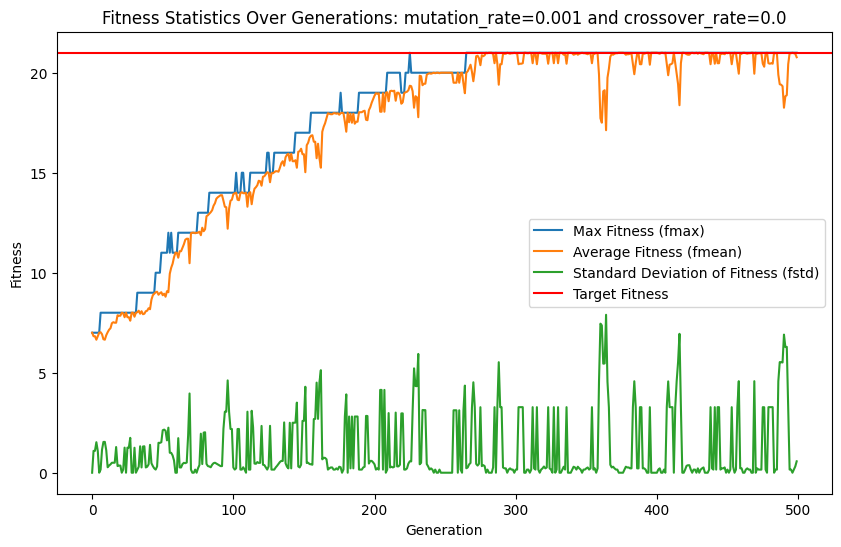

In [21]:
######## plot of the maximum and average fitnesses values over 500 generations: MUTATION_RATE=0.001 #######

#mutation_rate=0.001 looks like the perfect mutation rate for convergence
generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, genome_length=len(union_reacs), max_generations=500, mutation_rate=0.001, crossover_rate=0.0, individual1=S1_union, individual2=S2_union)

target_fitness = fitness(S2_union,S2_union)  # this is the target fitness, which is the fitness of the final organism we want to reach through evolution
print(target_fitness)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.001 and crossover_rate=0.0')
plt.legend()
plt.show()


Average Hamming Distance over generations: it's the number of positions at which the corresponding bits are different between pairs of individuals in each generation. This helps visualize how the population's genetic diversity is evolving.

---



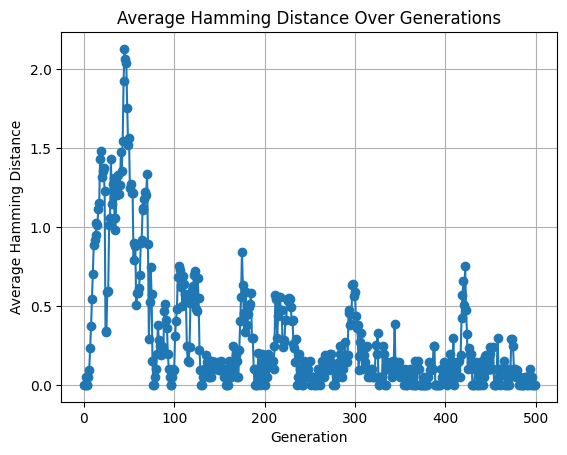

In [ ]:
    # Average Hamming distances Plotting
    plt.plot(avg_distances, marker='o')
    plt.title('Average Hamming Distance Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Average Hamming Distance')
    plt.grid(True)
    plt.show()

HEATMAP: each row represents a generation and each column represents a bit position in the binary strings. Color coding indicates the frequency of '1's in that position across the population, highlighting how certain bits (reactions) become more or less common over time.

---



Binary string representation of S1: 111111111000000001111
Binary string representation of S2: 111111000111111110001


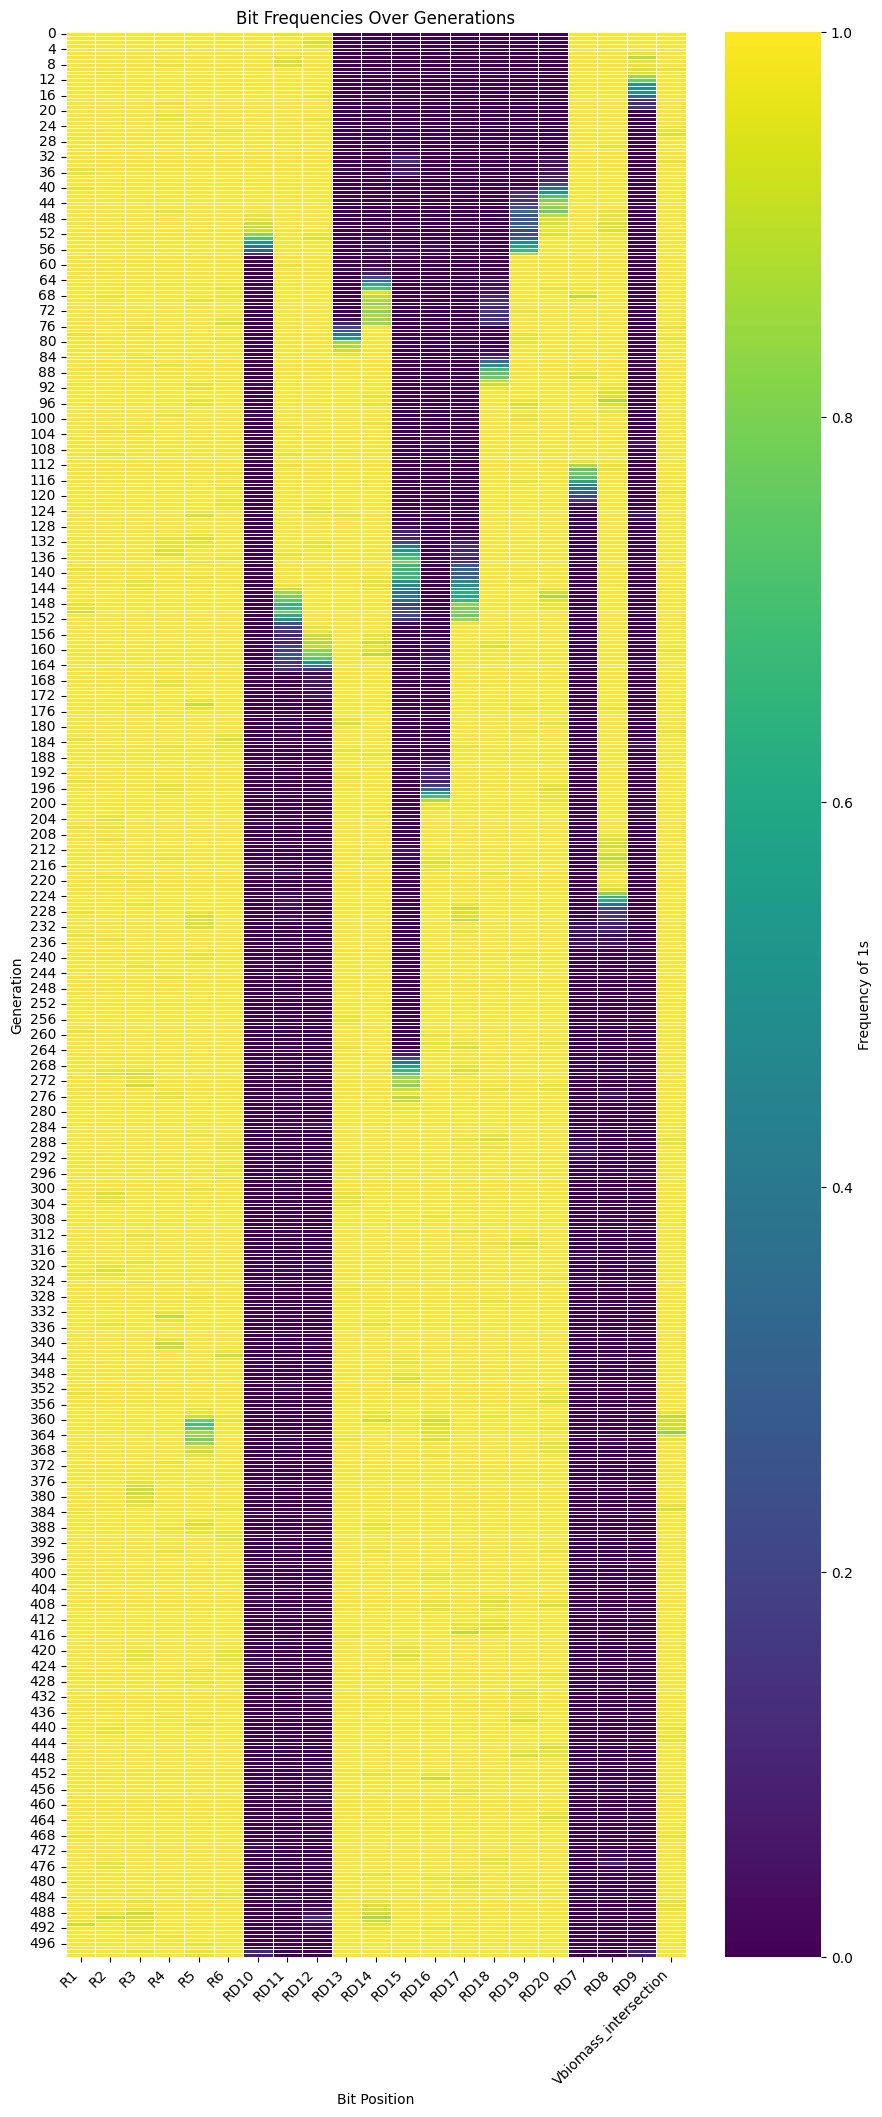

<Figure size 640x480 with 0 Axes>

In [27]:
# Heatmap plotting

num_generations = len(bit_freqs)
height_per_gen = max(10 / num_generations, 0.05)
fig_height = max(height_per_gen * num_generations, 10)

print("Binary string representation of S1:", binary_string_S1)
print("Binary string representation of S2:", binary_string_S2)

plt.figure(figsize=(10, fig_height))
ax = sns.heatmap(bit_freqs, cmap='viridis', linewidths=.5, cbar_kws={'label': 'Frequency of 1s'})
ax.set_title('Bit Frequencies Over Generations')
ax.set_xlabel('Bit Position')
ax.set_ylabel('Generation')
ax.set_xticklabels(union_reacs, rotation=45, ha="right")
plt.show()
# Save the image
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


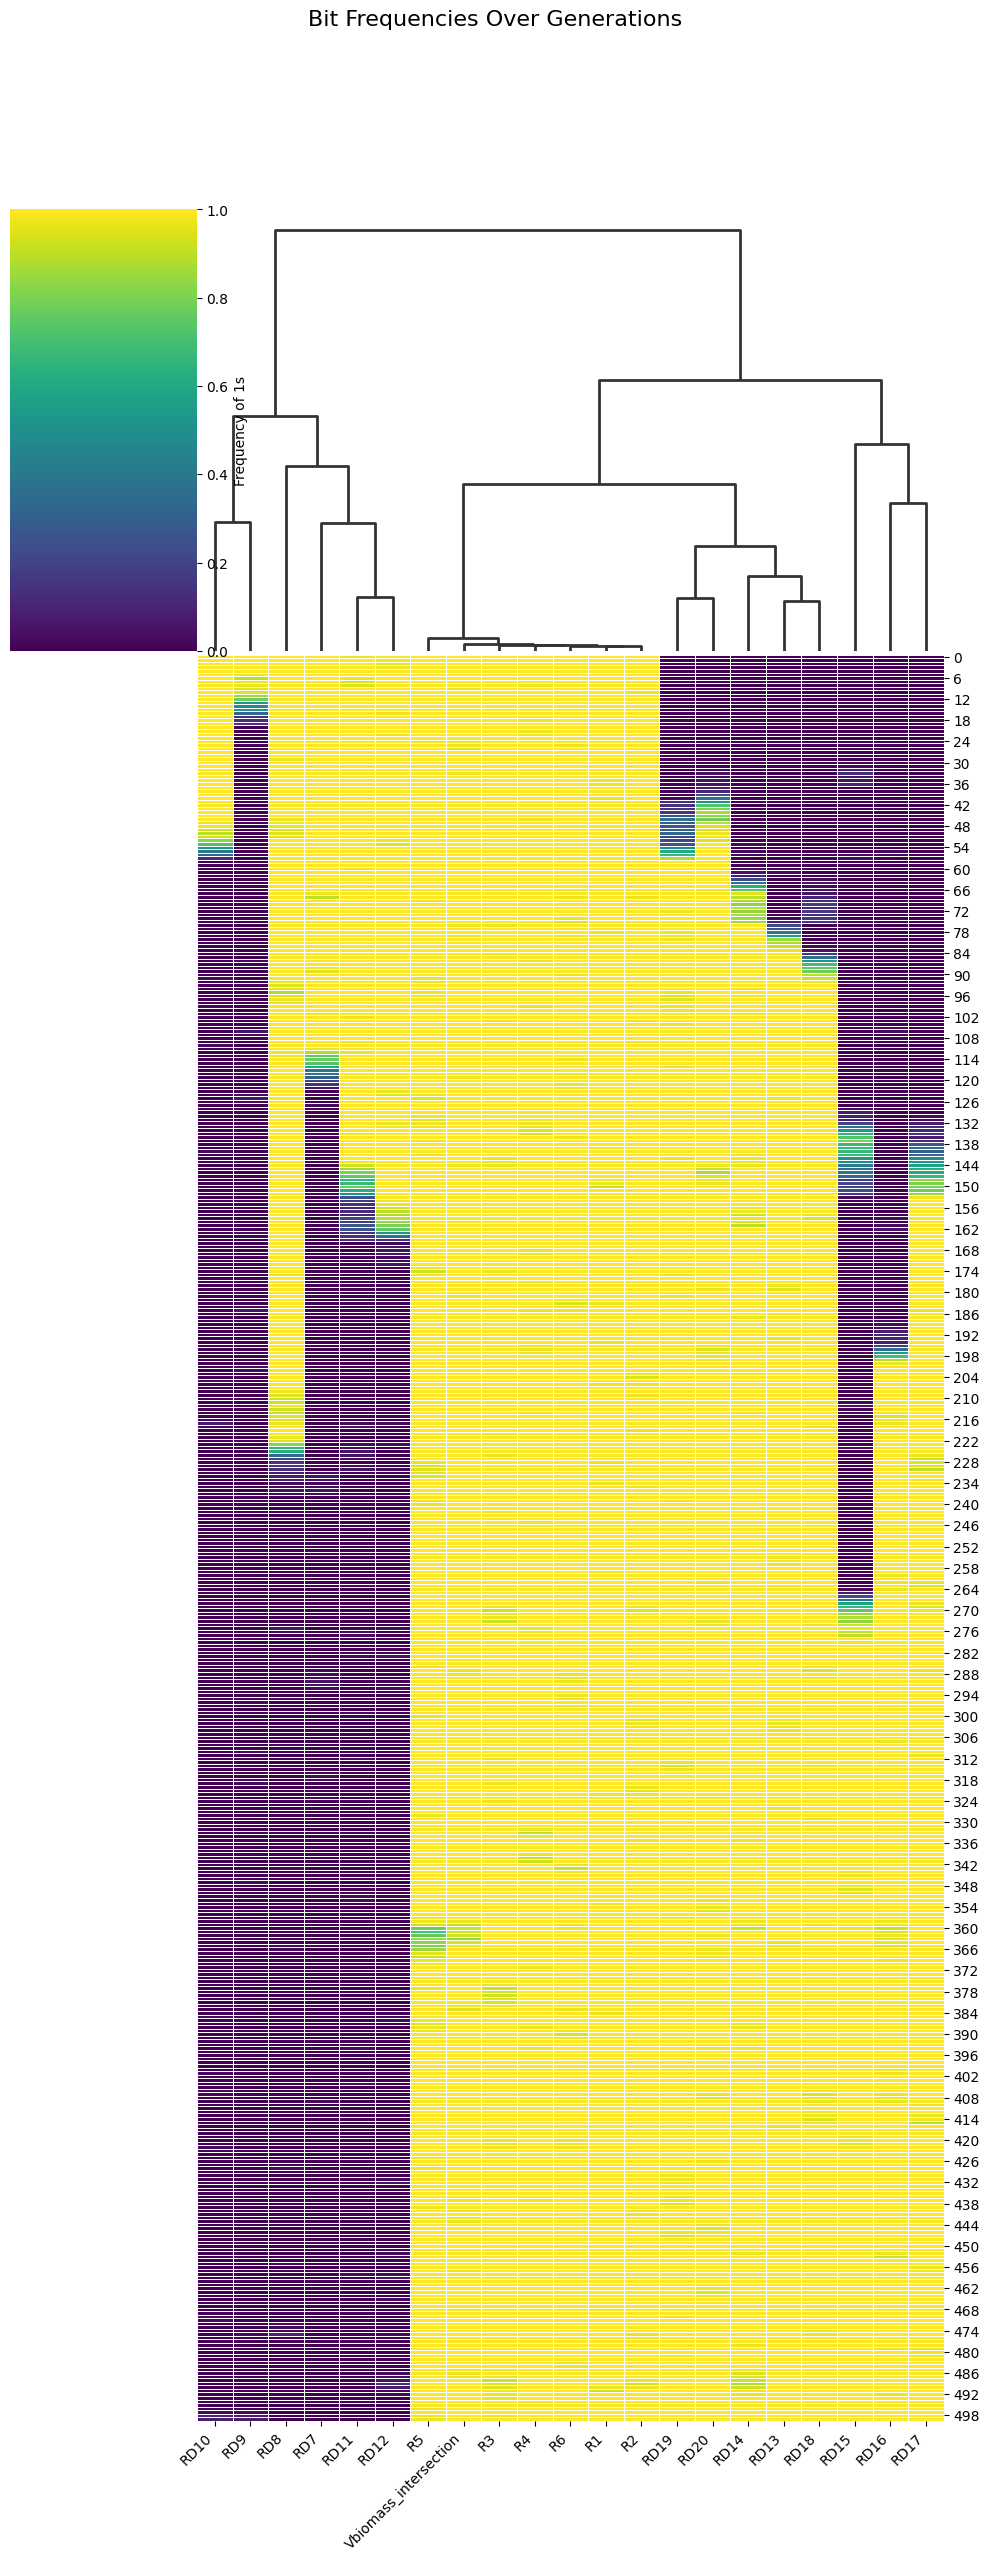

In [28]:

#Reactions Clustering: Columns are clustered together by similarity

num_generations = len(bit_freqs)
height_per_gen = max(10 / num_generations, 0.05)
fig_height = max(height_per_gen * num_generations, 10)
clustermap_fig = sns.clustermap(bit_freqs, cmap='viridis', linewidths=.5, cbar_kws={'label': 'Frequency of 1s'}, row_cluster=False, figsize=(10, fig_height))
# Reorder the reaction labels according to the clustering result
reordered_labels = [union_reacs[i] for i in clustermap_fig.dendrogram_col.reordered_ind]

clustermap_fig.fig.suptitle('Bit Frequencies Over Generations', fontsize=16)
plt.subplots_adjust(top=0.9)
# Set the x-axis labels on the heatmap axis according to the new order
clustermap_fig.ax_heatmap.set_xticklabels(reordered_labels, rotation=45, ha="right")
# Increase the linewidth of the dendrogram lines
clustermap_fig.ax_col_dendrogram.collections[0].set_linewidth(2)
# Show the plot
plt.show()



EVOLUTION FOR 500 GENERATIONS WITH MUTATION_RATE=0.01, CROSSOVER_RATE=0.0.

---

21


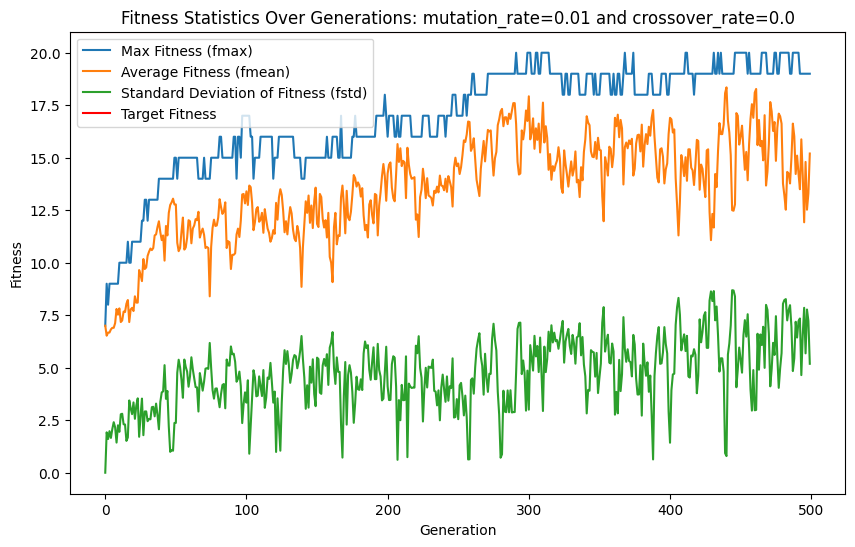

In [ ]:
######## plot of the maximum and average fitnesses values over 500 generations: MUTATION_RATE=0.01 #######

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, genome_length=len(union_reacs), max_generations=500, mutation_rate=0.01, crossover_rate=0.0, individual1=S1_union, individual2=S2_union)

target_fitness = fitness(S2_union,S2_union)  # this is the target fitness, which is the fitness of the final organism we want to reach through evolution
print(target_fitness)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.01 and crossover_rate=0.0')
plt.legend()
plt.show()

Average Hamming Distance over generations for mutation_rate=0.01

---



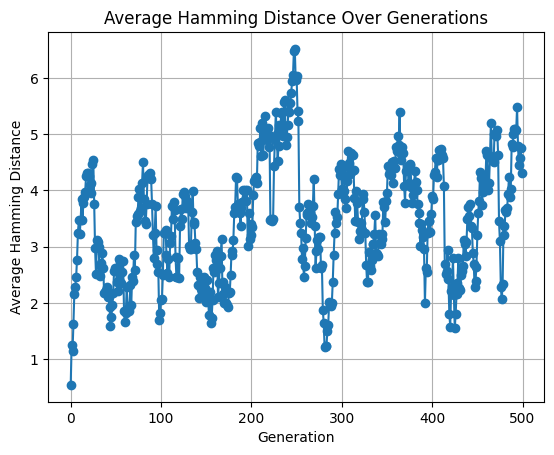

In [ ]:
    # Average Hamming distances Plotting
    plt.plot(avg_distances, marker='o')
    plt.title('Average Hamming Distance Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Average Hamming Distance')
    plt.grid(True)
    plt.show()

HEATMAP: From the heatmap you can see that with mutation_rate=0.01 the population doesn't converge to the target population as before having a mutation_rate=0.001

---


Binary string representation of S1: 111111111000000001111
Binary string representation of S2: 111111000111111110001


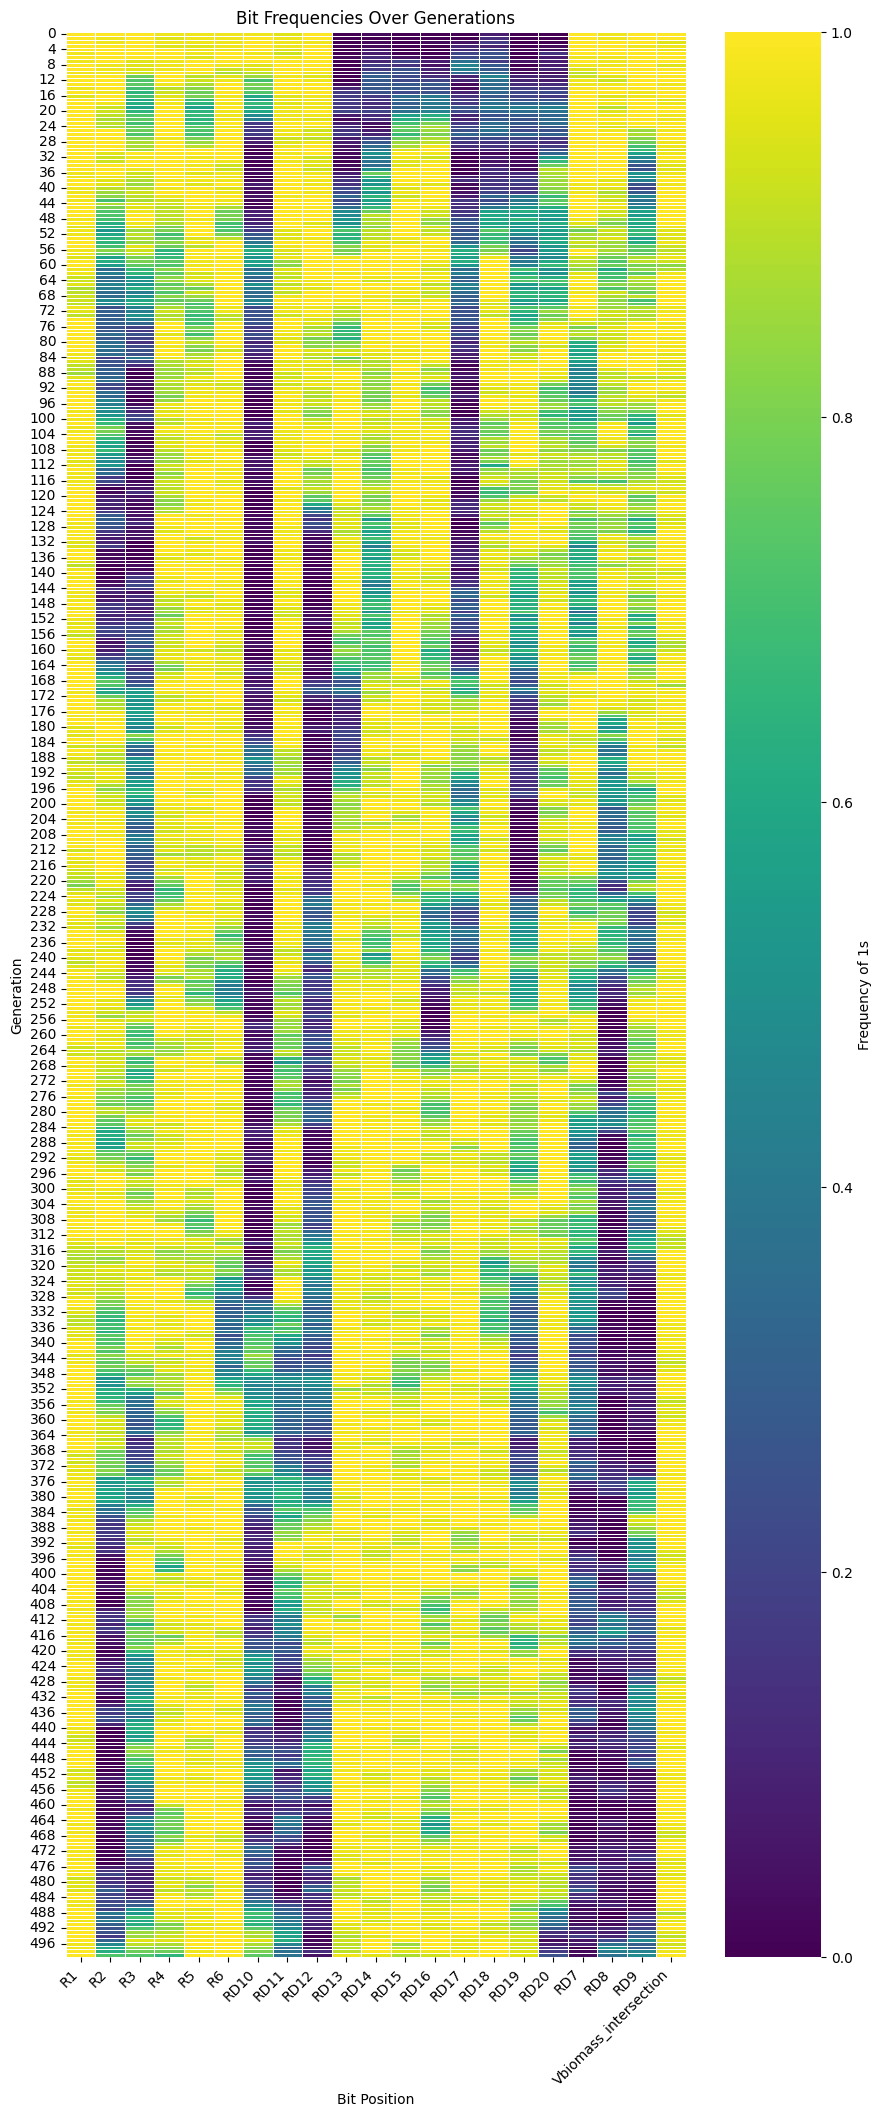

<Figure size 640x480 with 0 Axes>

In [ ]:
# Heatmap plotting

num_generations = len(bit_freqs)
height_per_gen = max(10 / num_generations, 0.05)
fig_height = max(height_per_gen * num_generations, 10)

print("Binary string representation of S1:", binary_string_S1)
print("Binary string representation of S2:", binary_string_S2)

plt.figure(figsize=(10, fig_height))
ax = sns.heatmap(bit_freqs, cmap='viridis', linewidths=.5, cbar_kws={'label': 'Frequency of 1s'})
ax.set_title('Bit Frequencies Over Generations')
ax.set_xlabel('Bit Position')
ax.set_ylabel('Generation')
ax.set_xticklabels(union_reacs, rotation=45, ha="right")
plt.show()
# Save the image
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

EVOLUTION FOR 500 GENERATIONS WITH MUTATION_RATE=0.001, CROSSOVER_RATE=0.01

---



21


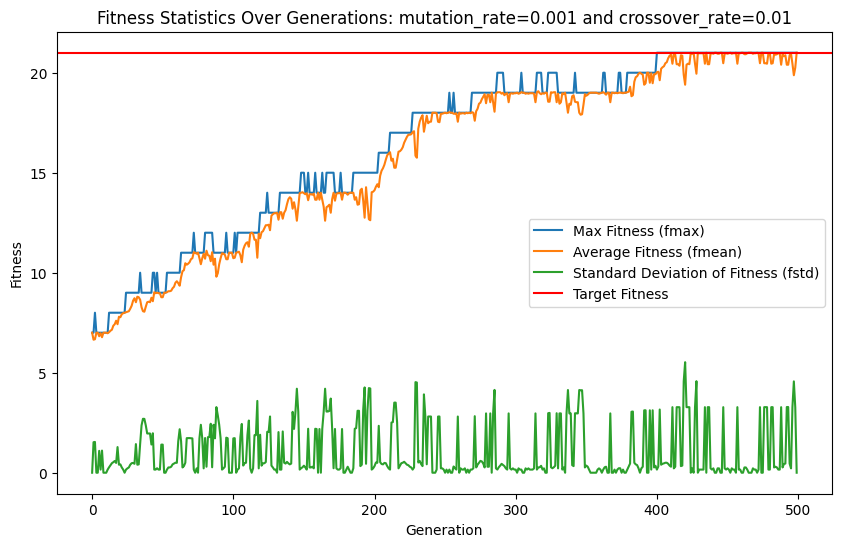

In [ ]:
######## plot of the maximum and average fitnesses values over 500 generations: MUTATION_RATE=0.001, CROSSOVER=0.01 #######

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, genome_length=len(union_reacs), max_generations=500, mutation_rate=0.001, crossover_rate=0.01, individual1=S1_union, individual2=S2_union)

target_fitness = fitness(S2_union,S2_union)  # this is the target fitness, which is the fitness of the final organism we want to reach through evolution
print(target_fitness)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.001 and crossover_rate=0.01')
plt.legend()
plt.show()

EVOLUTION FOR 500 GENERATIONS WITH MUTATION_RATE=0.001, CROSSOVER_RATE=0.001

---



21


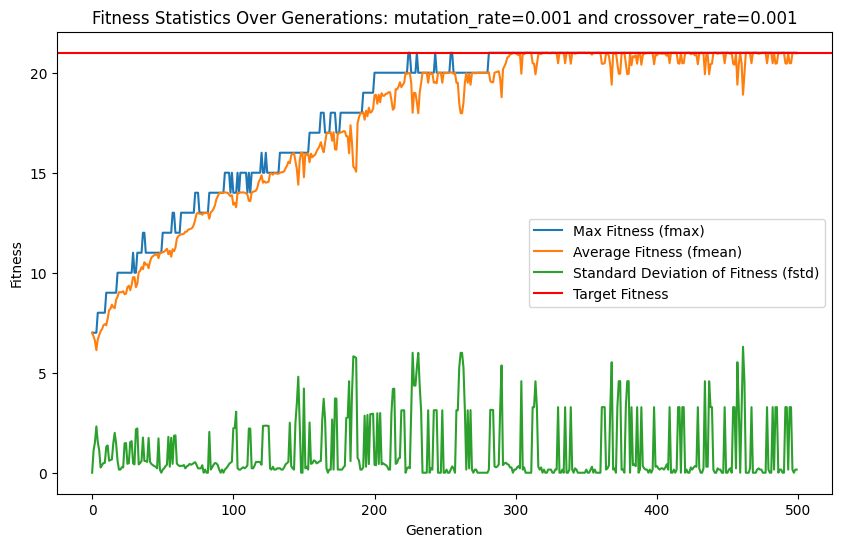

In [ ]:
######## plot of the maximum and average fitnesses values over 500 generations: MUTATION=0.001, CROSSOVER=0.001 #######

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, genome_length=len(union_reacs), max_generations=500, mutation_rate=0.001, crossover_rate=0.001, individual1=S1_union, individual2=S2_union)

target_fitness = fitness(S2_union,S2_union)  # this is the target fitness, which is the fitness of the final organism we want to reach through evolution
print(target_fitness)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.001 and crossover_rate=0.001')
plt.legend()
plt.show()

#RESULTS OBTAINED WITH DIFFERENT MUTATION RATES

---



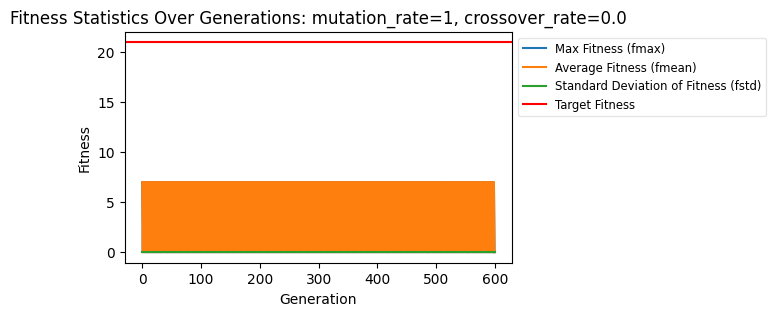

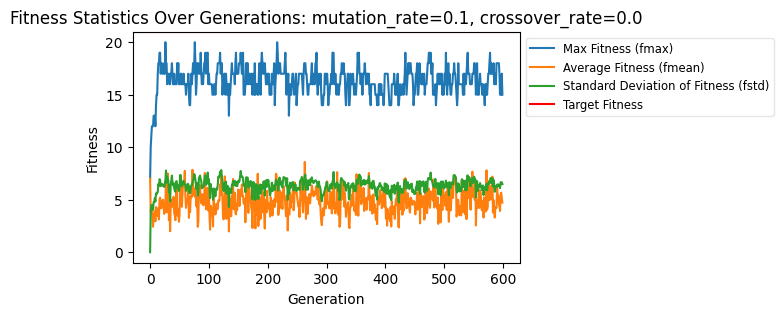

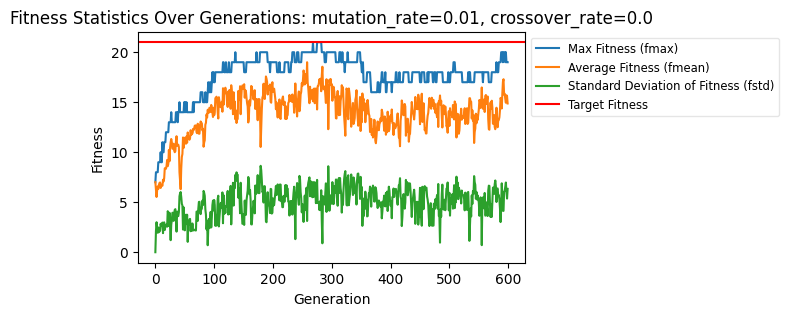

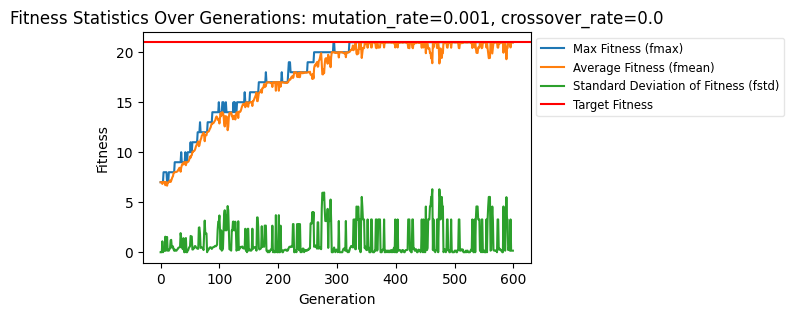

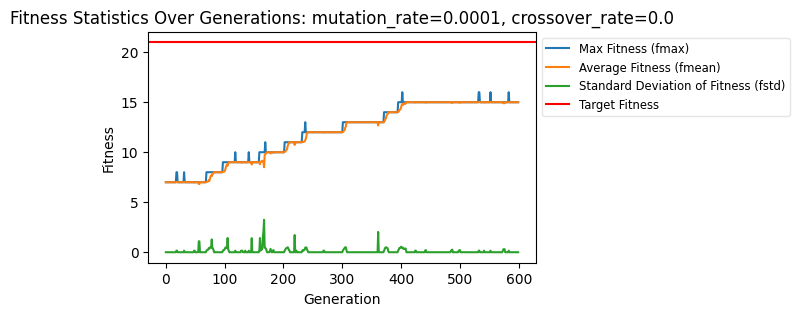

In [ ]:
####################### DIFFERENT MUTATIONS RATE #########################

##looking at the different mutation rates we can see as the output solution changes drastically from one to another. it looks like a mutation rate of
# 0.001 best fit the purpose of achieving the target final individual which is indiviual2

target_fitness = fitness(S2_union,S2_union)

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, max_generations=600, mutation_rate=1, crossover_rate=0.0, individual1=S1_union, individual2=S2_union)
plt.figure(figsize=(5, 3))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=1, crossover_rate=0.0')
plt.legend(fontsize='small', framealpha=0.5, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, max_generations=600, mutation_rate=0.1, crossover_rate=0.0, individual1=S1_union, individual2=S2_union)
plt.figure(figsize=(5, 3))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.1, crossover_rate=0.0')
plt.legend(fontsize='small', framealpha=0.5, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs= genetic_algorithm(pop_size=40, max_generations=600, mutation_rate=0.01, crossover_rate=0.0, individual1=S1_union, individual2=S2_union)
plt.figure(figsize=(5, 3))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.01, crossover_rate=0.0')
plt.legend(fontsize='small', framealpha=0.5, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, max_generations=600, mutation_rate=0.001, crossover_rate=0.0, individual1=S1_union, individual2=S2_union)
plt.figure(figsize=(5, 3))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.001, crossover_rate=0.0')
plt.legend(fontsize='small', framealpha=0.5, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

generation_numbers, avg_fitness, max_fitness, population1, population2,population_sizes,std_fitness, avg_distances, bit_freqs = genetic_algorithm(pop_size=40, max_generations=600, mutation_rate=0.0001, crossover_rate=0.0, individual1=S1_union, individual2=S2_union)
plt.figure(figsize=(5, 3))
plt.plot(generation_numbers, max_fitness, label='Max Fitness (fmax)')
plt.plot(generation_numbers, avg_fitness, label='Average Fitness (fmean)')
plt.plot(generation_numbers, std_fitness, label='Standard Deviation of Fitness (fstd)')
plt.axhline(y=target_fitness, color='r', linestyle='-', label='Target Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Statistics Over Generations: mutation_rate=0.0001, crossover_rate=0.0')
plt.legend(fontsize='small', framealpha=0.5, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

